In [575]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error


In [576]:
data = pd.read_csv("king_ country_ houses_aa.csv")
df = data.copy()

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [577]:
# column standardization
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [578]:
# dealing with data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [579]:
# dealing with NaN values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [580]:
# dealing with duplicates
df.duplicated().sum()

0

In [581]:
# dealing with empty spaces
df.eq(" ").sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [582]:
# checking unique values
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [583]:
#df.chas.value_counts()

In [584]:
df['year'] = df['date'].str.slice(0, 4).astype(int)
df['month'] = df['date'].str.slice(4, 6).astype(int)
df['day'] = df['date'].str.slice(6, 8).astype(int)

In [585]:
df['sale_price'] = df['price']
df = df.drop('price', axis=1)

df = df.rename(columns={'sale_price': 'price'})

In [586]:
df = df.drop(['id', 'date'], axis=1)

In [587]:
#df = df.drop(columns = ['date'])

In [588]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,0,98103,47.6993,-122.346,1530,1509,2014,5,21,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,0,98146,47.5107,-122.362,1830,7200,2015,2,23,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,0,98144,47.5944,-122.299,1020,2007,2014,6,23,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,0,98027,47.5345,-122.069,1410,1287,2015,1,16,400000.0


In [589]:
# checking outliers
df.corrwith(df["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
day             -0.014670
zipcode         -0.053203
dtype: float64

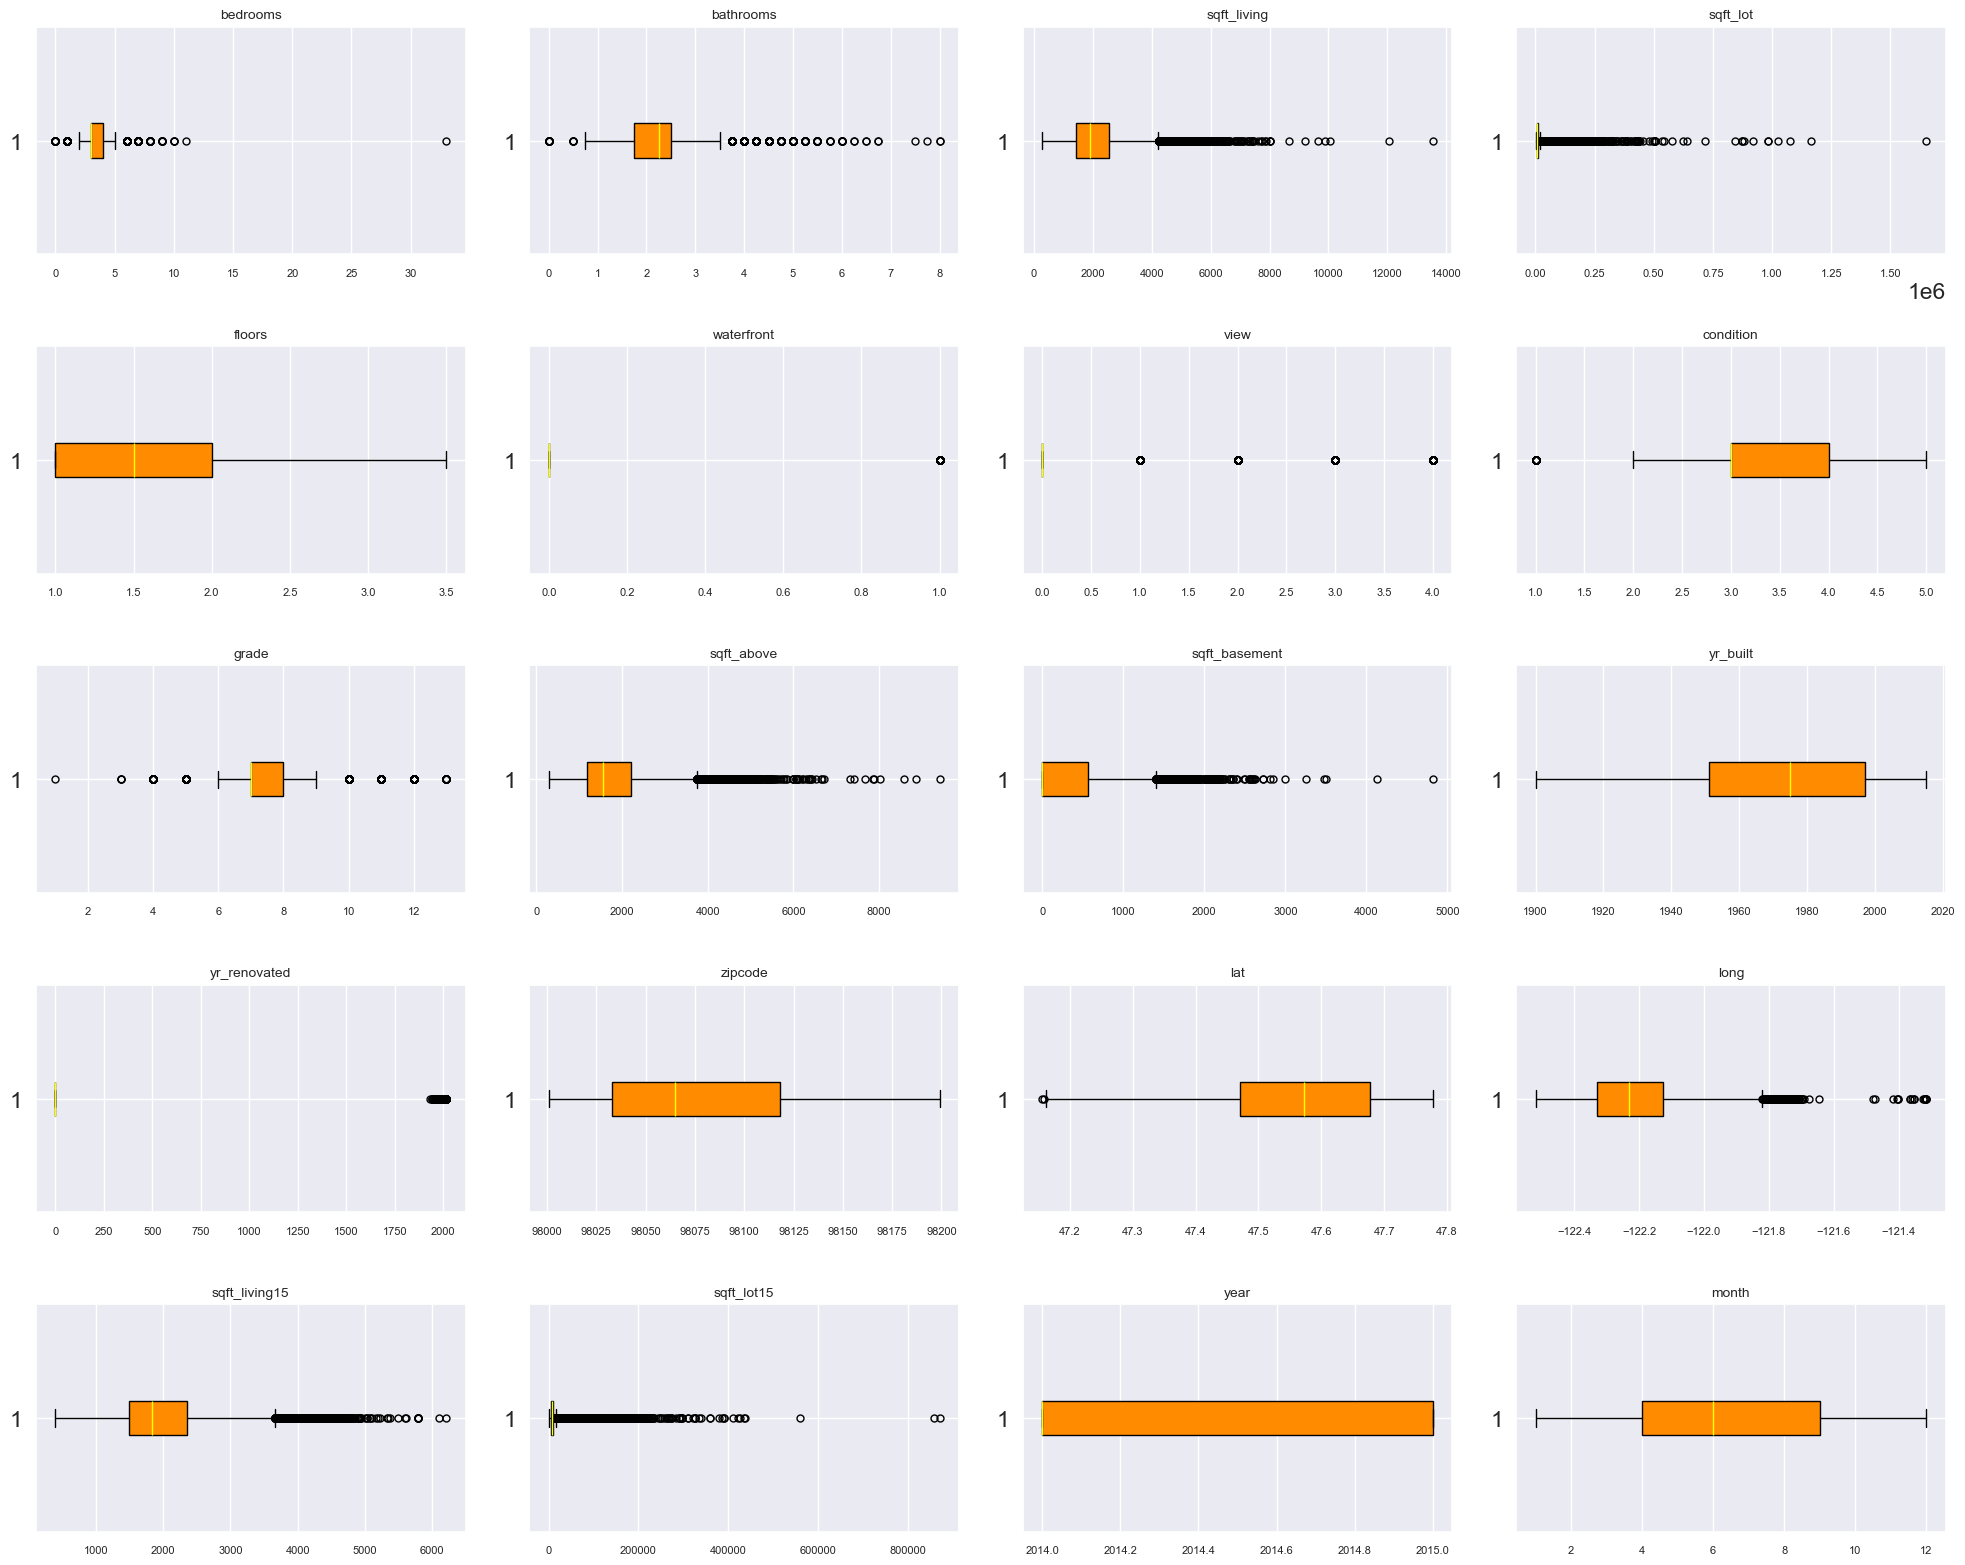

In [590]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

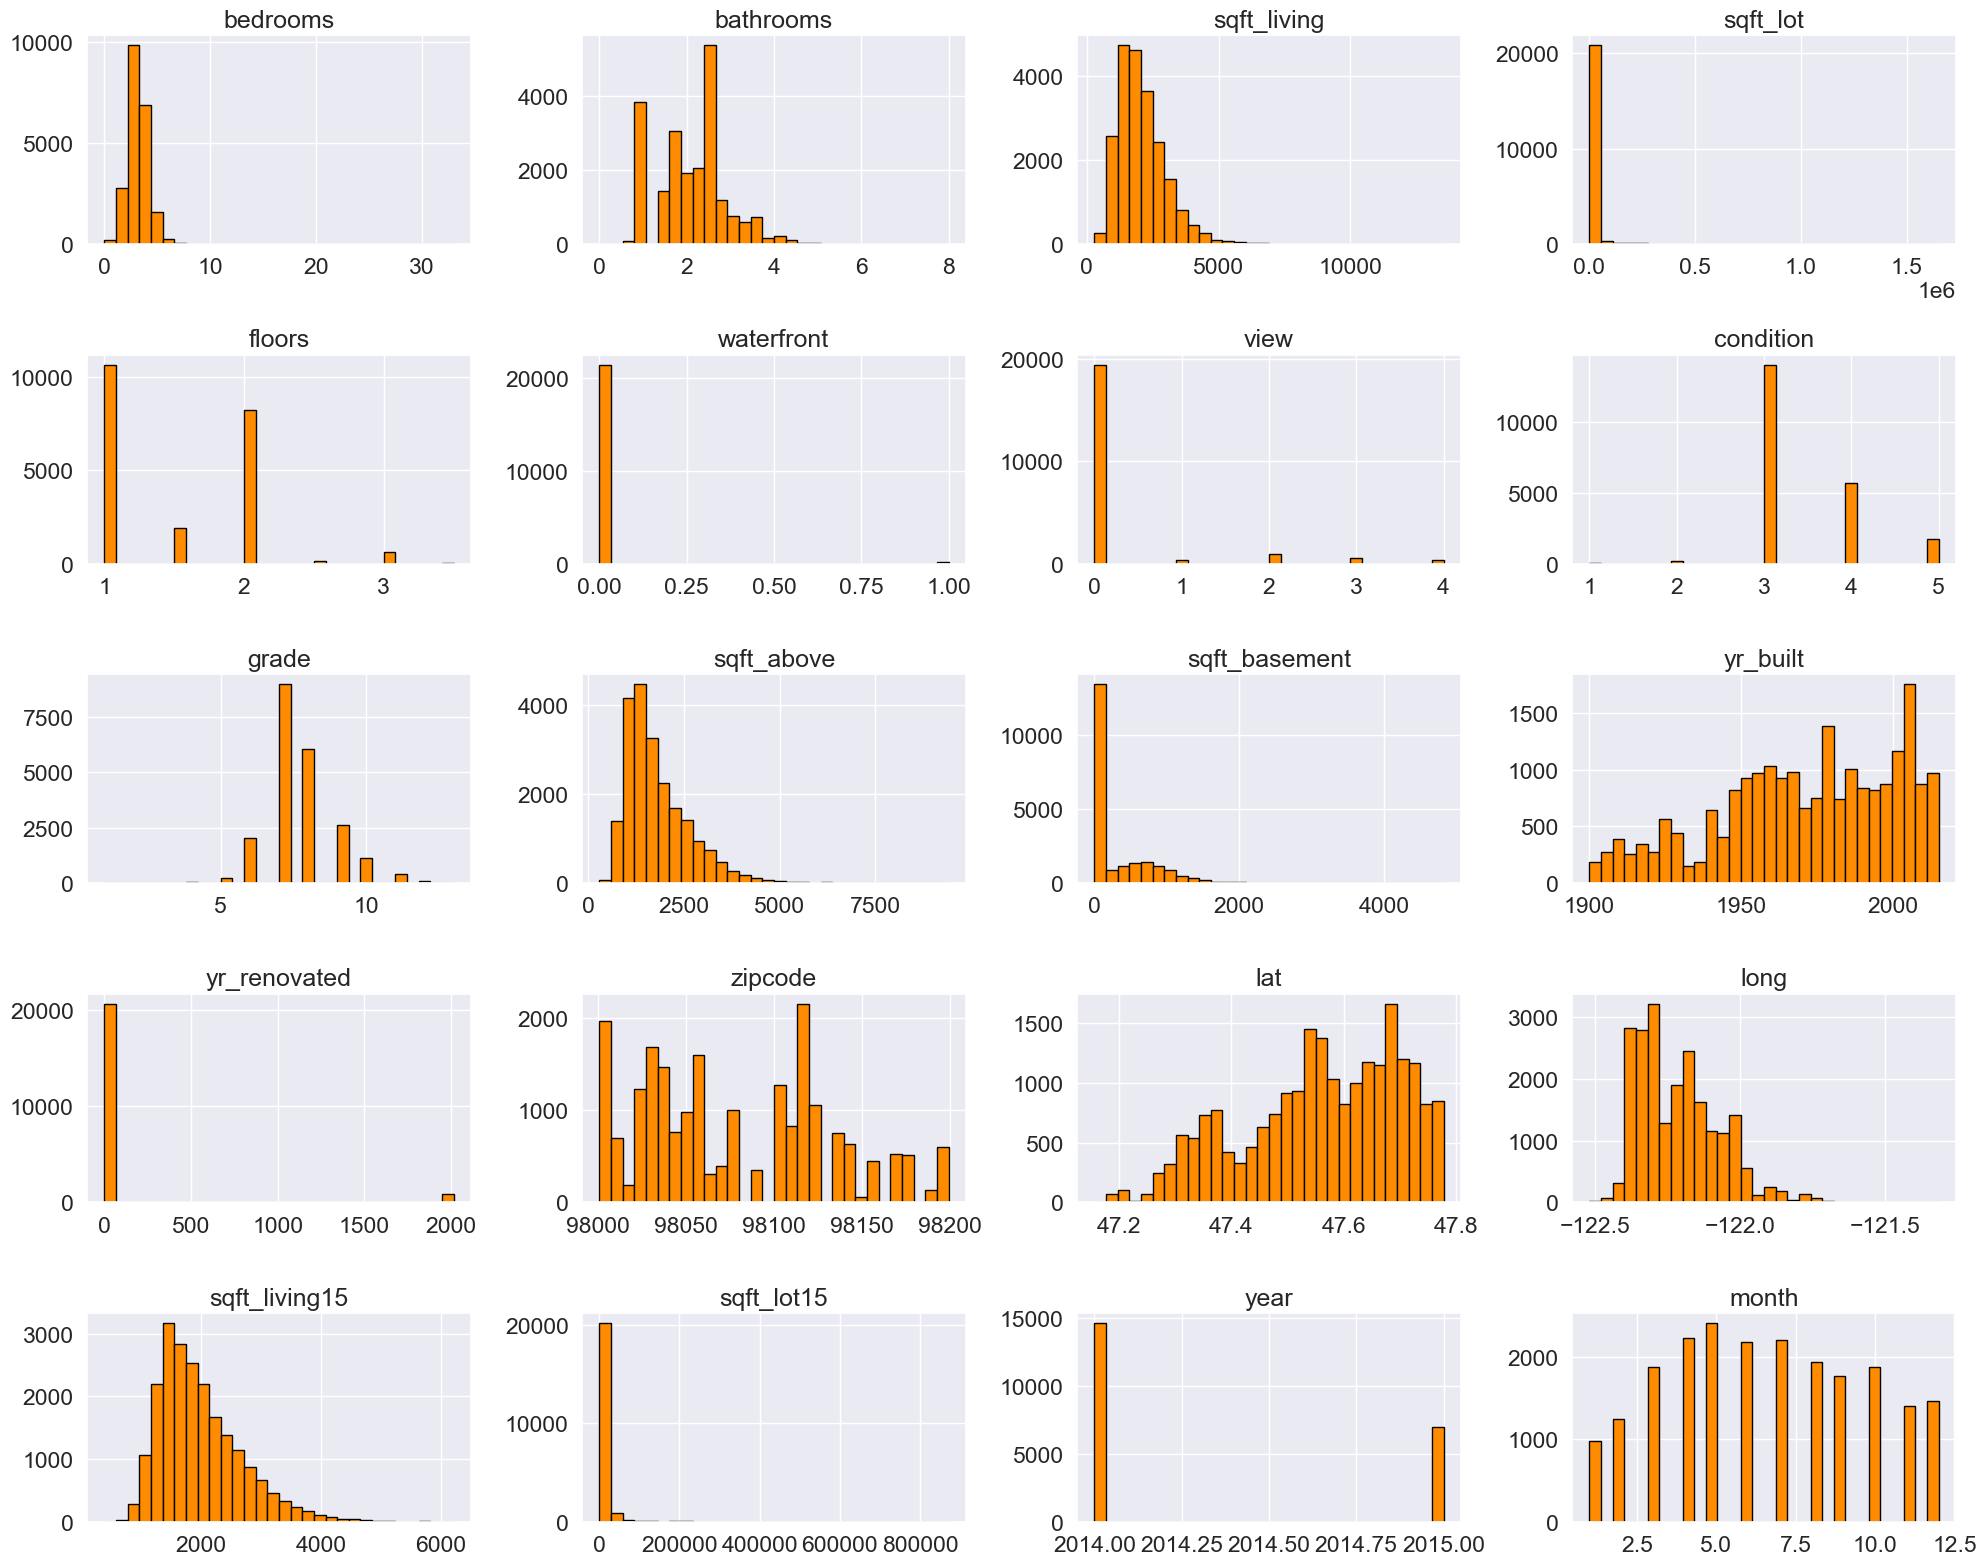

In [591]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

In [592]:
# looking for correlations with the target
df.corrwith(df["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
day             -0.014670
zipcode         -0.053203
dtype: float64

In [593]:
# dealing with multicolinearitiy 
num_corr = round(df.corr(), 2)


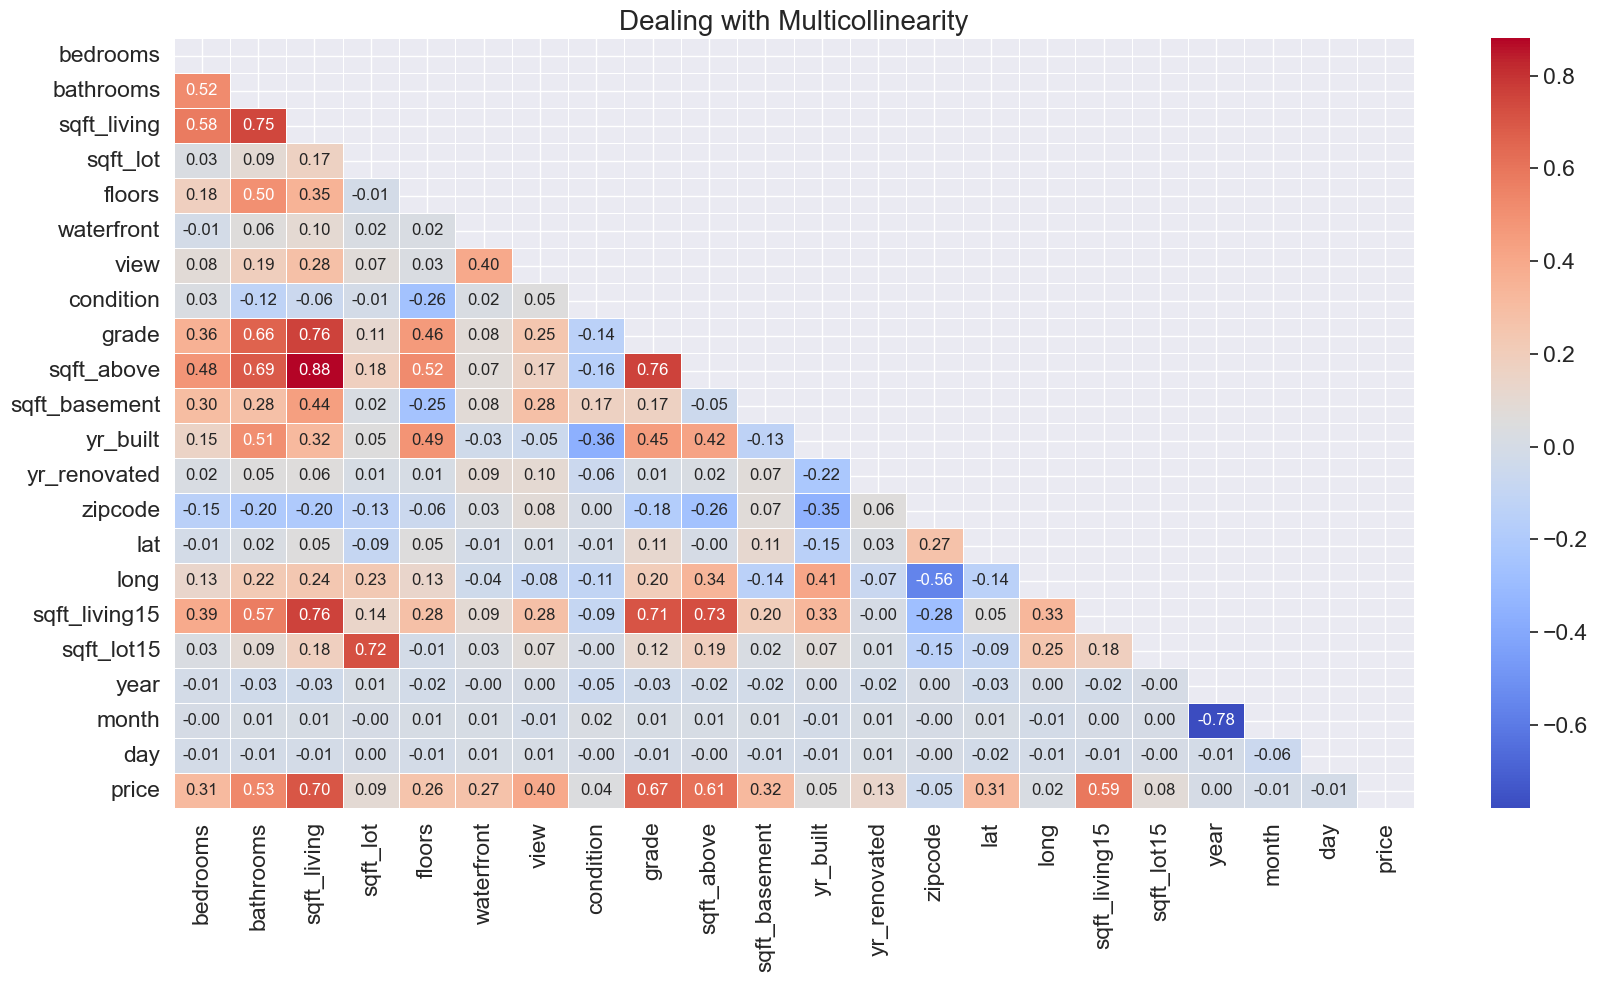

In [594]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [595]:
df = df.drop(columns=["zipcode", "sqft_above", "sqft_living15", "sqft_lot15", "grade", "bathrooms", "bedrooms", "year", "month", "day", ])


In [596]:
# dealing with multicolinearitiy 
num_corr = round(df.corr(), 2)

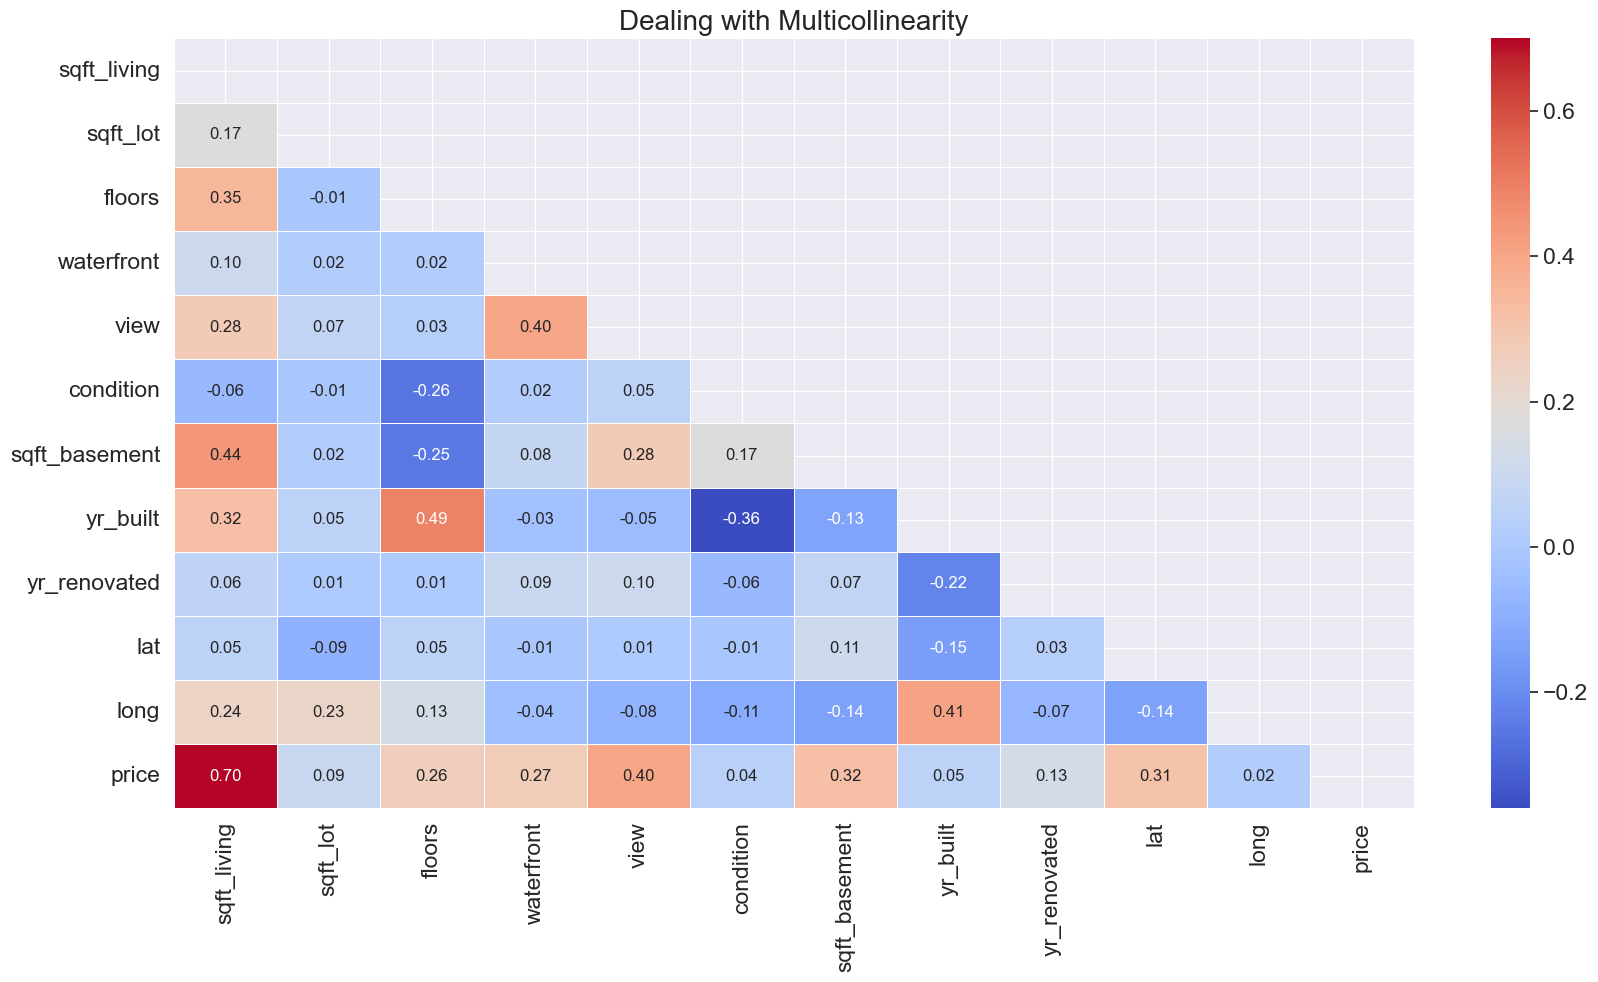

In [597]:
# Correlation Matrix-Heatmap Plot UPDATED
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

### Modeling

In [598]:
#X-y Split
X = df.drop(columns="price")
y = df.price

In [599]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [600]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 17290.
30% for test data: 4323.


In [601]:
model = LinearRegression()

In [602]:
model


LinearRegression()

In [603]:
model.fit(X_train, y_train)

LinearRegression()

In [604]:
predictions = model.predict(X_test)

In [605]:
# Make a dataframe to compare

eval_df = pd.DataFrame({"actual":y_test,"pred":predictions})
eval_df

,actual,pred
735,365000.0,4.564334e+05
2830,865000.0,8.121256e+05
4106,1038000.0,1.114458e+06
16218,1490000.0,1.452206e+06
19964,711000.0,6.788545e+05
...,...,...
13674,338000.0,4.922458e+05
20377,673000.0,6.664383e+05
8805,285000.0,4.187996e+05
10168,605000.0,6.034109e+05


In [606]:
eval_df["dif"] = abs(eval_df["actual"]-eval_df["pred"])
eval_df.head()

,actual,pred,dif
735,365000.0,4.564334e+05,91433.399789
2830,865000.0,8.121256e+05,52874.412298
4106,1038000.0,1.114458e+06,76457.660702
16218,1490000.0,1.452206e+06,37793.987826
19964,711000.0,6.788545e+05,32145.486022


In [607]:
# metrics

r2_3 = r2_score(y_test, predictions)
RMSE_3 = root_mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

In [608]:
#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.6484
RMSE =  230565.9283
MAE =  141598.7525


In [609]:
mean = df["price"].mean()

mean

540088.1417665294

### 06 Improving the Model

#### Ridge Regression

In [610]:
from sklearn.linear_model import Ridge

In [611]:
model = Ridge()

In [612]:
model.fit(X_train, y_train)

Ridge()

In [613]:
predictions_ridge = model.predict(X_test)

#### Model Validation

In [614]:
# metrics

r2_3_2 = r2_score(y_test, predictions)
RMSE_3_2 = root_mean_squared_error(y_test, predictions)
MAE_3_2 = mean_absolute_error(y_test, predictions)


In [615]:
#Printing the results
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.6484
RMSE =  230565.9283
MAE =  141598.7525


#### Lasso Regression

In [616]:
from sklearn.linear_model import Lasso

In [617]:
model = Lasso()

In [618]:
model.fit(X_train, y_train)

Lasso()

In [619]:
predictions_lasso = model.predict(X_test)

#### Model Validation

In [620]:
# Metrics
r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = root_mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)

In [621]:
#Printing the results
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))

R2 =  0.6484
RMSE =  230566.8375
MAE =  141598.6057


In [622]:
from sklearn.linear_model import LassoCV

In [623]:
# Standardisiere die Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso Modell, das L1-Regularisierung anwendet
lasso = LassoCV(cv=5).fit(X_train, y_train)

# Erstellen eines DataFrames für die Gewichtung der Features
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lasso.coef_)
}).sort_values(by='Importance', ascending=False)

print("Feature-Gewichtungen basierend auf Lasso:")
print(feature_importances)

Feature-Gewichtungen basierend auf Lasso:
          Feature     Importance
0     sqft_living  258124.829369
9             lat   93476.882817
4            view   54996.871663
3      waterfront   47049.780653
7        yr_built   35560.725112
6   sqft_basement   31599.472771
10           long   21796.560188
5       condition   20124.024825
8    yr_renovated   13662.563945
2          floors   12759.933497
1        sqft_lot    1545.103281


In [658]:
y_pred = lasso.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



Mean Squared Error (MSE): 53170130547.86
Root Mean Squared Error (RMSE): 230586.49
R² Score: 0.65


### Decision Tree Regression

In [625]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [626]:
predictions_tree = tree.predict(X_test)

In [627]:
r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = root_mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

In [628]:
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.6866
RMSE =  217672.3889
MAE =  107604.92


#### KNN Regression

In [629]:
from sklearn.neighbors import KNeighborsRegressor

In [630]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [631]:
predictions_knn = knn.predict(X_test)

In [632]:
r2_3_5 = r2_score(y_test, predictions_knn)
RMSE_3_5 = root_mean_squared_error(y_test, predictions_knn)
MAE_3_5 = mean_absolute_error(y_test, predictions_knn)

In [633]:
print("R2 = ", round(r2_3_5, 4))
print("RMSE = ", round(RMSE_3_5, 4))
print("MAE = ", round(MAE_3_5, 4))

R2 =  0.7586
RMSE =  191052.7869
MAE =  97809.4721


### XGBoost 

In [634]:
import xgboost as xgb

In [635]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [636]:
predictions_xgb = xgbr.predict(X_test)

In [637]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = root_mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

In [638]:
from sklearn.ensemble import RandomForestRegressor

# Erstelle und trainiere das Random-Forest-Modell
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Vorhersagen für den Testdatensatz
predictions_randomforest = rf_model.predict(X_test)

# Bewertung des Modells
r2_3_7 = r2_score(y_test, predictions_randomforest)
RMSE_3_7 = root_mean_squared_error(y_test, predictions_randomforest)
MAE_3_7 = mean_absolute_error(y_test, predictions_randomforest)

### Poly. Regression

In [639]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [640]:
'''# Definiere den Grad des Polynoms
degree = 2

# Modellerstellung mittels eines Pipelines: Polynomiale Transformation + Lineare Regression
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Trainiere das Modell mit den Trainingsdaten
model.fit(X_train, y_train)

# Vorhersagen für den Testdatensatz
predictions = model.predict(X_test)

# Evaluiere das Modell
rmse = root_mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Visualisiere die Ergebnisse
plt.scatter(X_test, y_test, color='blue', label='Echte Werte', alpha=0.6)
plt.scatter(X_test, predictions, color='red', label='Vorhergesagte Werte', alpha=0.6)
plt.xlabel('Merkmal')
plt.ylabel('Zielvariable')
plt.title('Polynomische Regression Vorhersage')
plt.legend()
plt.show()'''

'# Definiere den Grad des Polynoms\ndegree = 2\n\n# Modellerstellung mittels eines Pipelines: Polynomiale Transformation + Lineare Regression\nmodel = make_pipeline(PolynomialFeatures(degree), LinearRegression())\n\n# Trainiere das Modell mit den Trainingsdaten\nmodel.fit(X_train, y_train)\n\n# Vorhersagen für den Testdatensatz\npredictions = model.predict(X_test)\n\n# Evaluiere das Modell\nrmse = root_mean_squared_error(y_test, predictions)\nr2 = r2_score(y_test, predictions)\n\nprint(f"Mean Squared Error: {mse:.2f}")\nprint(f"R^2 Score: {r2:.2f}")\n\n# Visualisiere die Ergebnisse\nplt.scatter(X_test, y_test, color=\'blue\', label=\'Echte Werte\', alpha=0.6)\nplt.scatter(X_test, predictions, color=\'red\', label=\'Vorhergesagte Werte\', alpha=0.6)\nplt.xlabel(\'Merkmal\')\nplt.ylabel(\'Zielvariable\')\nplt.title(\'Polynomische Regression Vorhersage\')\nplt.legend()\nplt.show()'

### Final Comparison

In [641]:
metrics = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'KNN', 'XGBoost', 'RandomForest'],
    'R²': [r2_3, r2_3_2, r2_3_3, r2_3_4, r2_3_5, r2_3_6, r2_3_7],
    'RMSE': [RMSE_3, RMSE_3_2, RMSE_3_3, RMSE_3_4, RMSE_3_5, RMSE_3_6, RMSE_3_7],
    'MAE': [MAE_3, MAE_3_2, MAE_3_3, MAE_3_4, MAE_3_5, MAE_3_6, MAE_3_7]
}

In [642]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model").T

Model,Linear Regression,Ridge,Lasso,Decision Tree,KNN,XGBoost,RandomForest
R²,0.648354,0.648354,0.648351,0.686584,0.758553,0.781380,0.842807
RMSE,230565.928327,230565.928327,230566.837452,217672.388934,191052.786871,181797.279998,154155.461609
MAE,141598.752503,141598.752503,141598.605656,107604.919963,97809.472080,103367.229102,76119.212151


### Normalization with MinMaxScaler

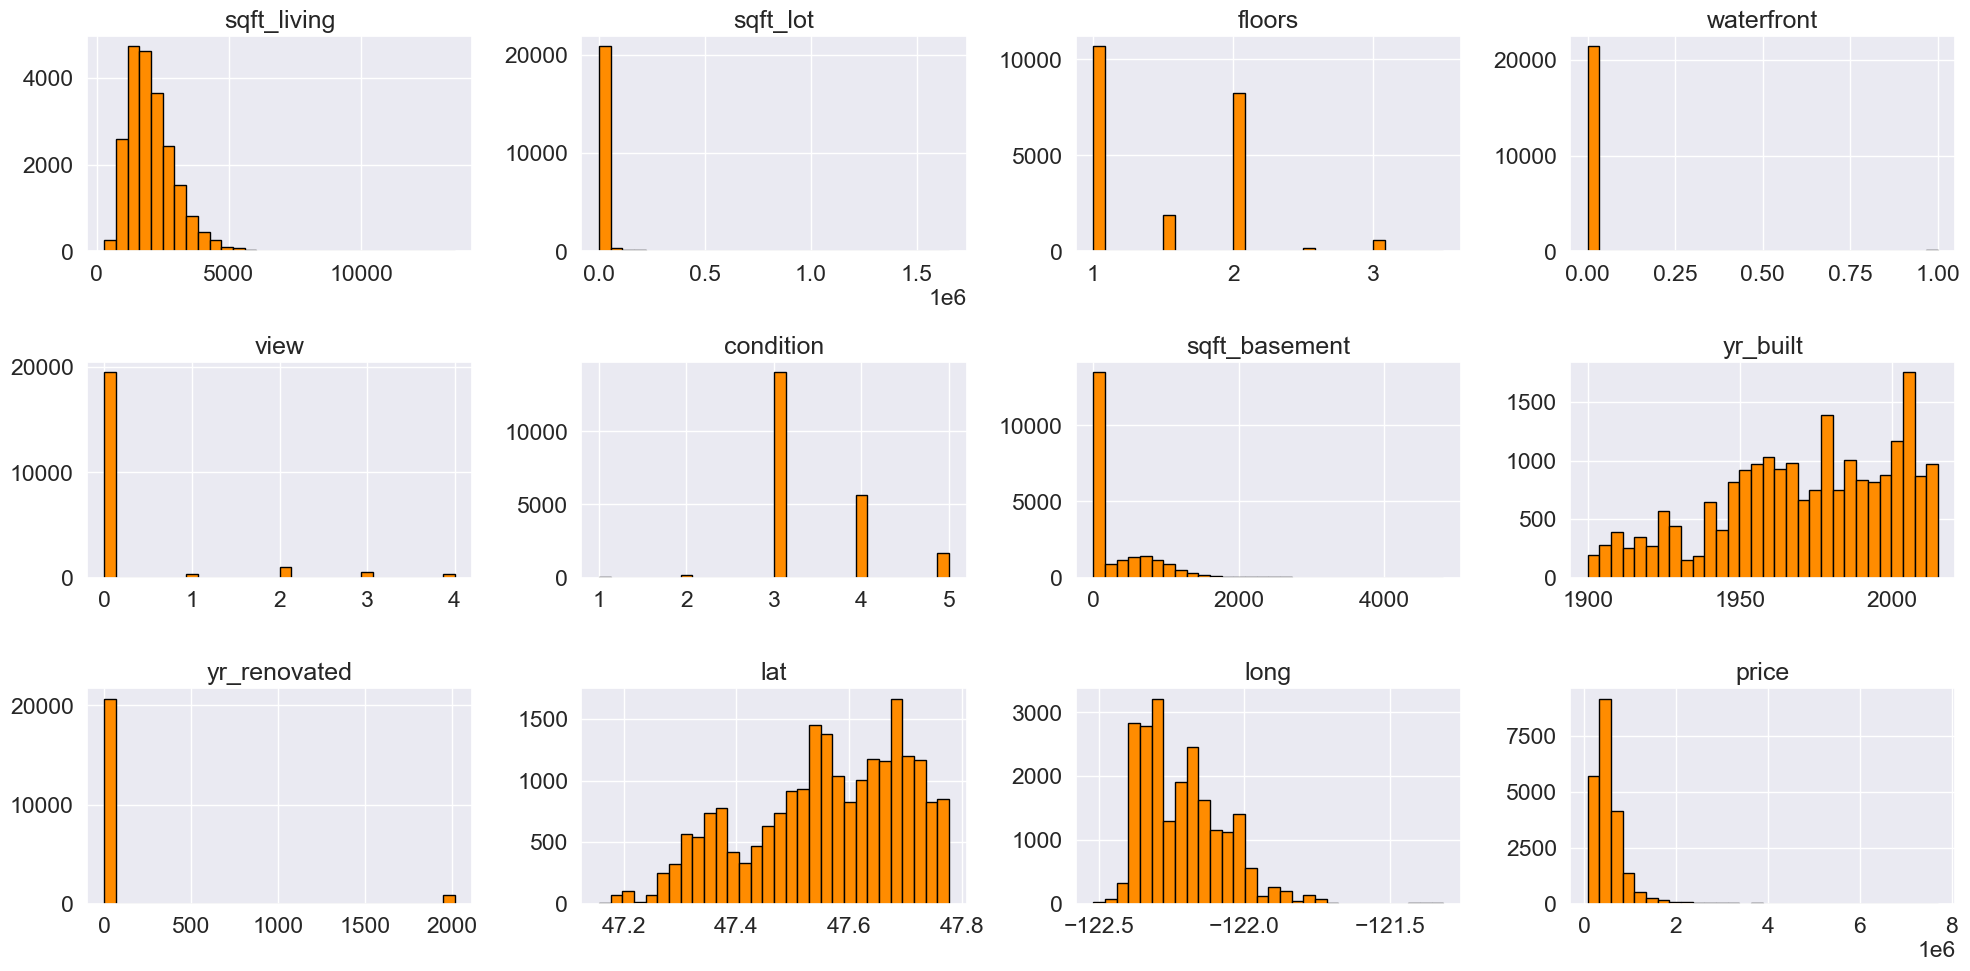

In [643]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

In [644]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

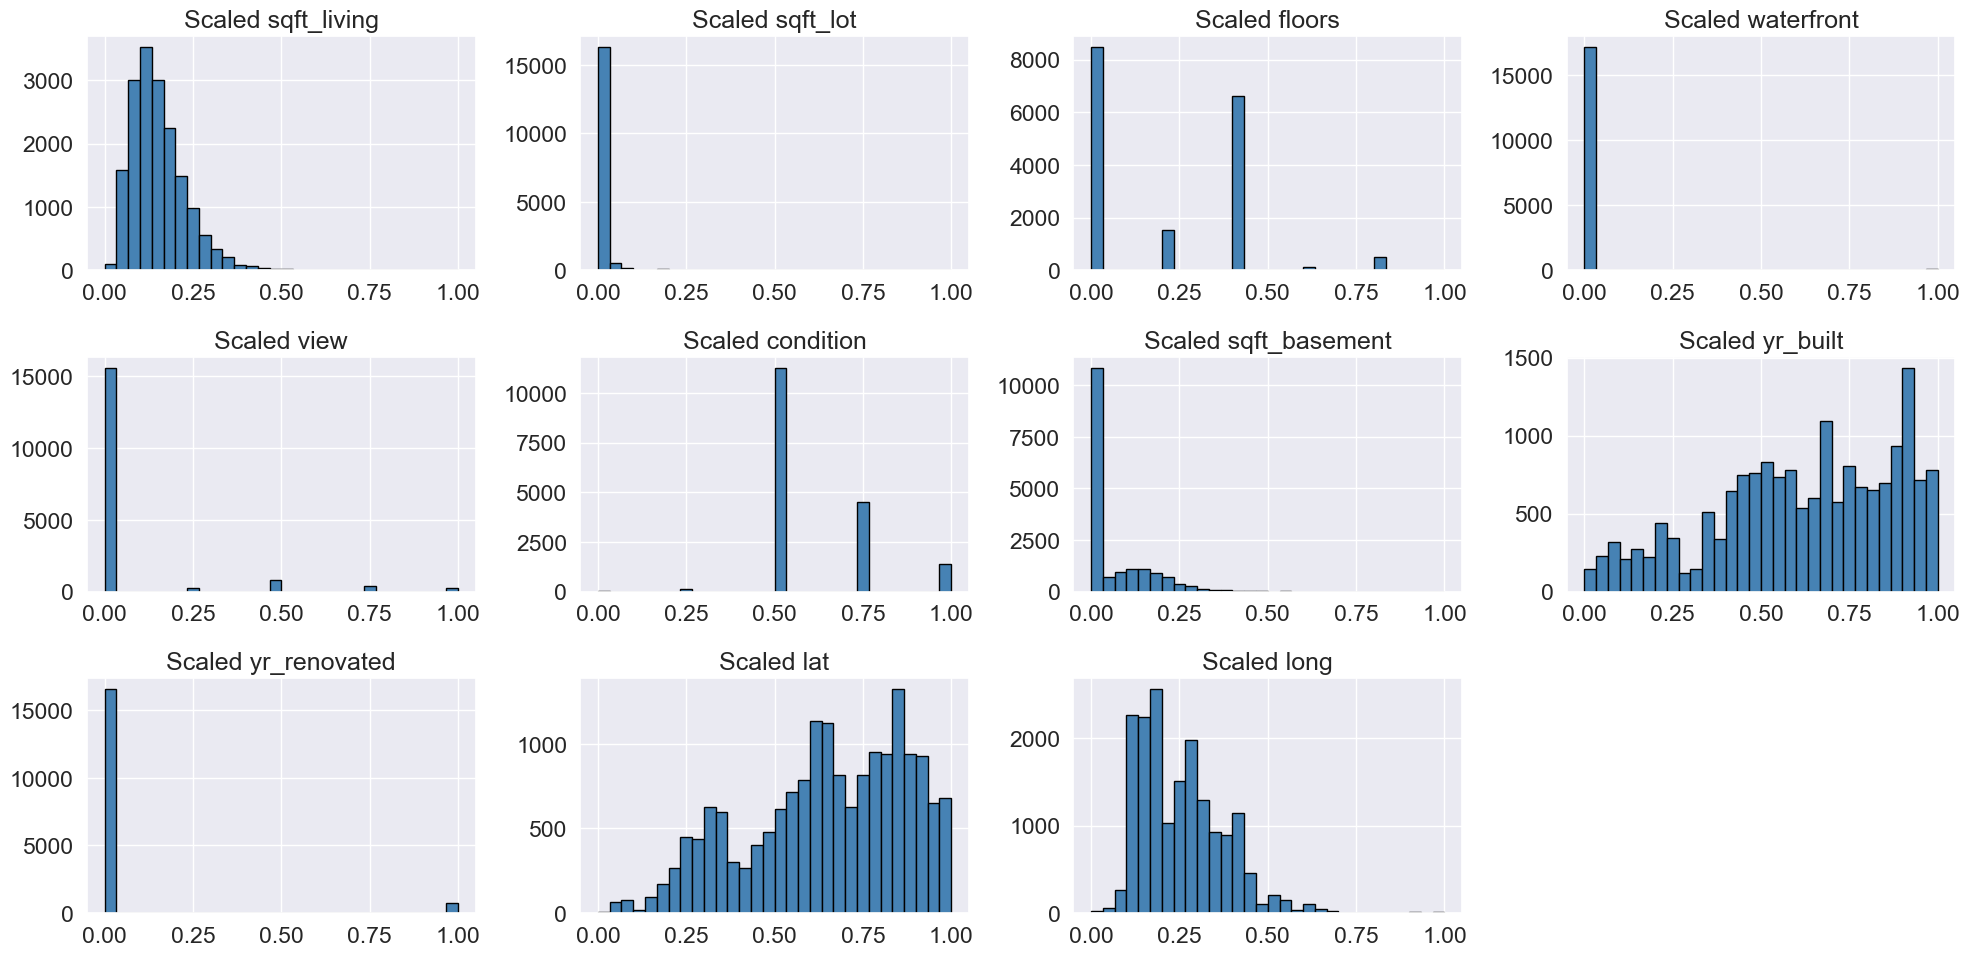

In [645]:
color = '#4682B4'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= X_train_scaled.shape[1]:
        ax.set_visible(False)
        continue
    ax.hist(X_train_scaled[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(f'Scaled {df.columns[i]}')

plt.tight_layout()
plt.show()

In [646]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train_scaled, y_train)

predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [647]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = root_mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8732
RMSE =  138430.6813
MAE =  73862.2436


### Standardization with StandardScaler

In [648]:
from sklearn.preprocessing import StandardScaler

In [649]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [650]:
xgbr.fit(X_train_scaled, y_train)
predictions_xgb_2 = xgbr.predict(X_test_scaled)

In [651]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = root_mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8732
RMSE =  138430.6813
MAE =  73862.2436


In [652]:
# same for randomforest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


predictions_randomforest = rf_model.predict(X_test_scaled)


r2_3_7 = r2_score(y_test, predictions_randomforest)
RMSE_3_7 = root_mean_squared_error(y_test, predictions_randomforest)
MAE_3_7 = mean_absolute_error(y_test, predictions_randomforest)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8427
RMSE =  154183.7673
MAE =  76133.6081


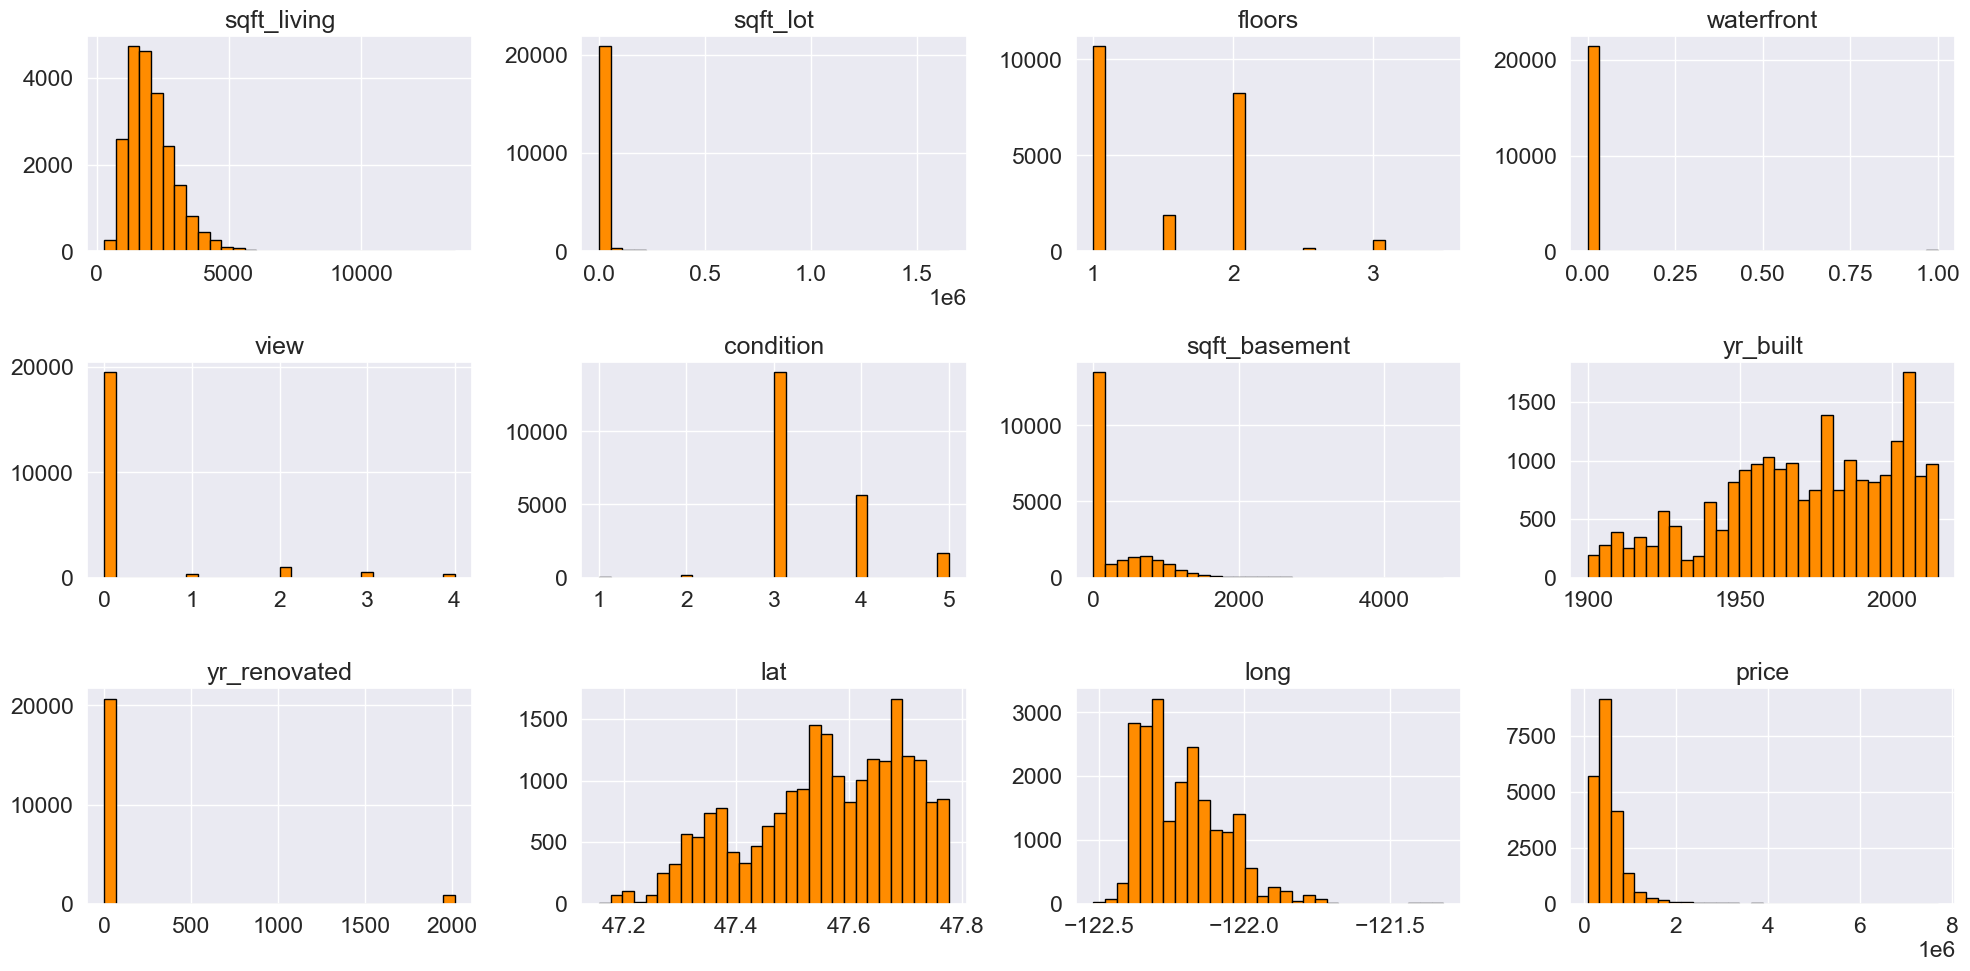

In [653]:
color = '#FF8C00'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

### Normalization with Log Transform

In [654]:
X_train_log = np.log1p(X_train) 
X_test_log = np.log1p(X_test)

/var/folders/1m/50y9vknn1lx05wgwhbgqtdh80000gn/T/ipykernel_11449/1663662661.py:1: RuntimeWarning: invalid value encountered in log1p
  X_train_log = np.log1p(X_train)
/var/folders/1m/50y9vknn1lx05wgwhbgqtdh80000gn/T/ipykernel_11449/1663662661.py:2: RuntimeWarning: invalid value encountered in log1p
  X_test_log = np.log1p(X_test)


In [655]:
xgbr.fit(X_train_log, y_train)
predictions_xgb_2 = xgbr.predict(X_test_log)

In [656]:
r2_3_7 = r2_score(y_test, predictions_xgb_2)
RMSE_3_7 = root_mean_squared_error(y_test, predictions_xgb_2)
MAE_3_7 = mean_absolute_error(y_test, predictions_xgb_2)

#Printing the results
print("R2 = ", round(r2_3_7, 4))
print("RMSE = ", round(RMSE_3_7, 4))
print("MAE = ", round(MAE_3_7, 4))

R2 =  0.8809
RMSE =  134210.3007
MAE =  75113.0285


### Actual vs Predicted Values

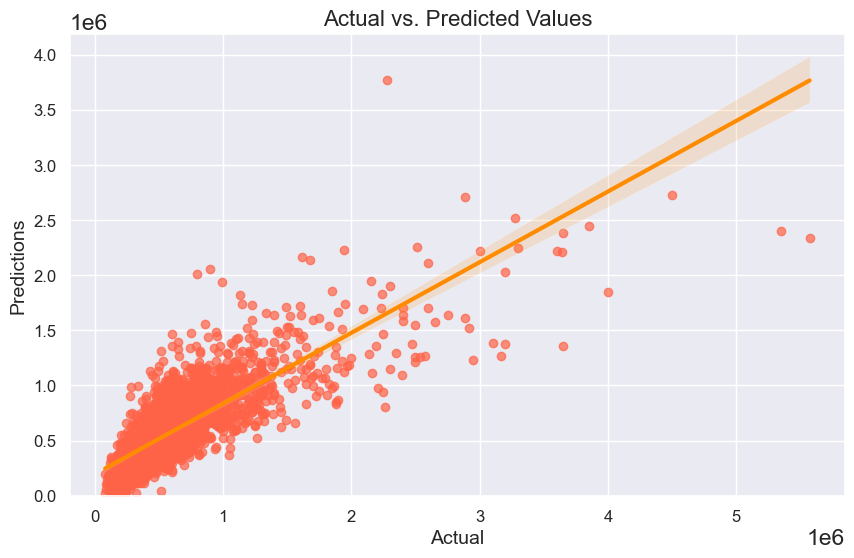

In [657]:
scatter_color = "#FF6347"
line_color = "#FF8C00"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()